In [ ]:
import numpy as np
import pandas as pd  # Import the pandas library and give it the alias 'pd'
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt # Import the matplotlib library and give it the alias 'plt'
import seaborn as sns # Import the seaborn library, assuming you intend to use it for histplot
from scipy import stats  # Import the stats module
import math
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=8, n_informative=5, n_redundant=2, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 8) (1000,)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path= '/content/drive/MyDrive/Crop_recommendation.csv'

In [ ]:
data= pd.read_csv('/content/drive/MyDrive/Crop_recommendation.csv')

Feature: 0, Score: 75.33801
Feature: 1, Score: 63.51250
Feature: 2, Score: 0.00000
Feature: 3, Score: 90.25366
Feature: 4, Score: 88.02200
Feature: 5, Score: 30.71608
Feature: 6, Score: 0.00000
Feature: 7, Score: -0.00000


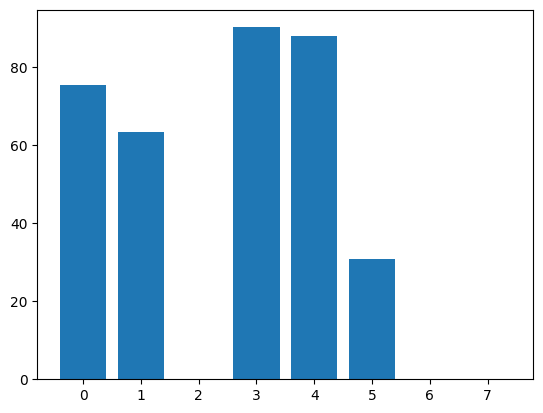

In [ ]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=220, n_features=8, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.15267
Feature: 1, Score: 0.03448
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.15535
Feature: 4, Score: 0.29612
Feature: 5, Score: 0.19231
Feature: 6, Score: 0.11593
Feature: 7, Score: 0.05315


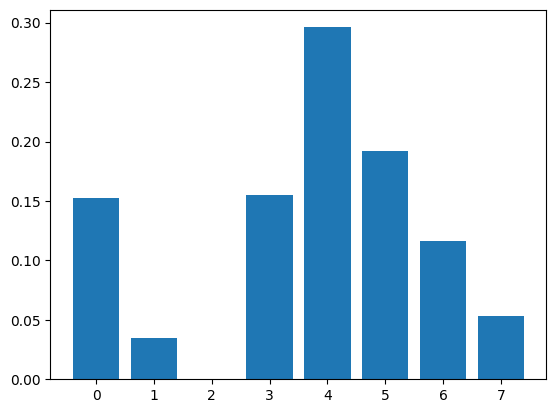

In [ ]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=200, n_features=8, n_informative=5, n_redundant=2, random_state=1)
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 1342.40398
Feature: 1, Score: 70.29593
Feature: 2, Score: 2267.72890
Feature: 3, Score: 46.27117
Feature: 4, Score: 84.98638
Feature: 5, Score: 1857.11768
Feature: 6, Score: 4405.42221
Feature: 7, Score: 2575.08255


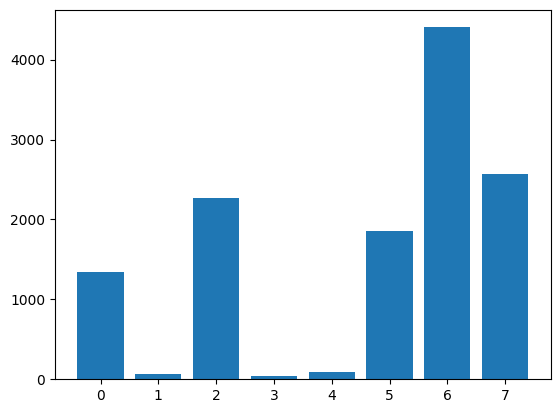

In [ ]:
# permutation feature importance with knn for regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=8, n_informative=5, random_state=1)
# define the model
model = KNeighborsRegressor()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
# evaluation of a model using all features
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# define the dataset
X, y = make_classification(n_samples=1000, n_features=8, n_informative=5, n_redundant=2, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 79.39


Eploratory Data Analysis(EDA)

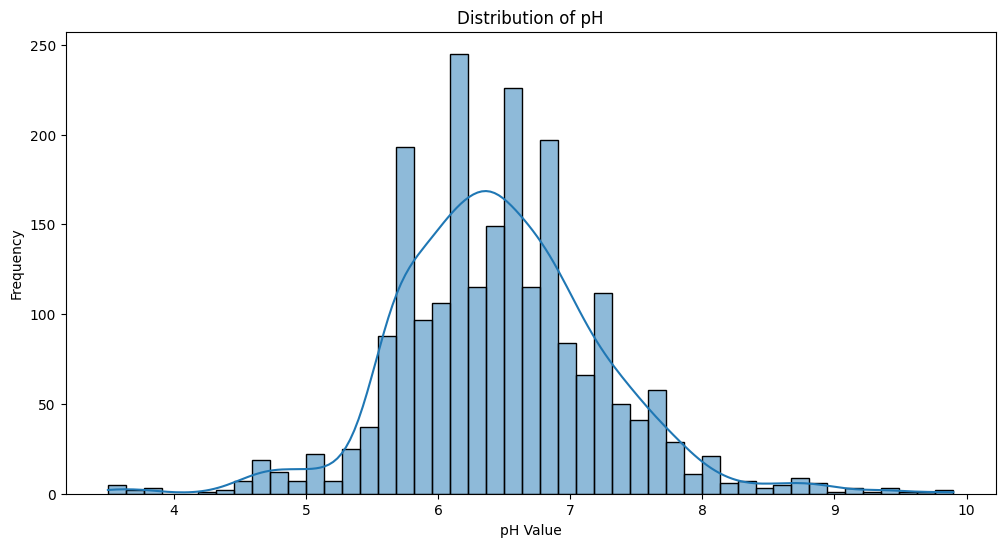

In [ ]:
plt.figure(figsize=(12, 6))
# Verify the column name - it might be 'ph', 'PH', or something else
# Alternatively, if the column doesn't exist, you'll need to calculate or load it into the DataFrame
sns.histplot(data['ph'], kde=True)
plt.title('Distribution of pH')
plt.xlabel('pH Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
num_cols = ['N','P','K','temperature','humidity','ph','rainfall','label']

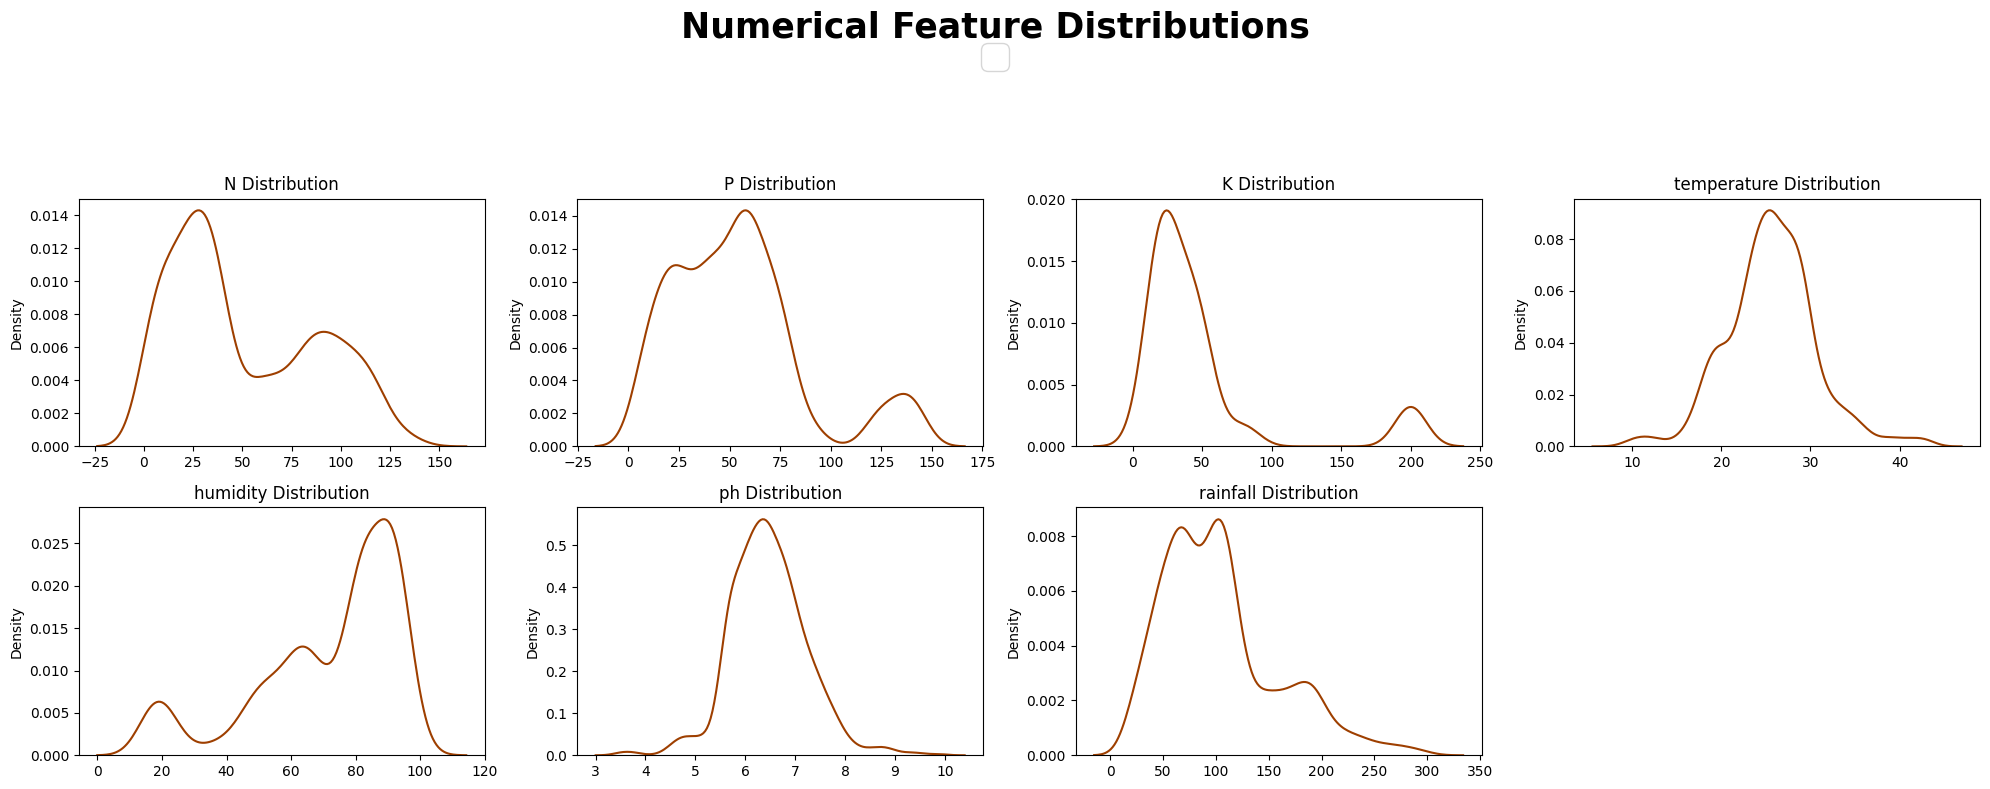

In [ ]:
features = num_cols[:-1] # Exclude the 'label' column
n_bins = 50
histplot_hyperparams = {
    'kde':True,
    'alpha':0.4,
    'stat':'percent',
    'bins':n_bins
}

columns = features # Use the modified features list
n_cols = 4
n_rows = math.ceil(len(columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
ax = ax.flatten()

for i, column in enumerate(columns):
    plot_axes = [ax[i]]
    sns.kdeplot( data[column], ax=ax[i], color='#9E3F00' )

    # titles
    ax[i].set_title(f'{column} Distribution');
    ax[i].set_xlabel(None)

    # remove axes to show only one at the end
    plot_axes = [ax[i]]
    handles = []
    labels = []
    for plot_ax in plot_axes:
        handles += plot_ax.get_legend_handles_labels()[0]
        labels += plot_ax.get_legend_handles_labels()[1]
        plot_ax.legend().remove()

for i in range(i+1, len(ax)):
    ax[i].axis('off')

fig.suptitle(f'Numerical Feature Distributions\n\n\n', ha='center',  fontweight='bold', fontsize=25)
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.96), fontsize=25, ncol=3)
plt.tight_layout()

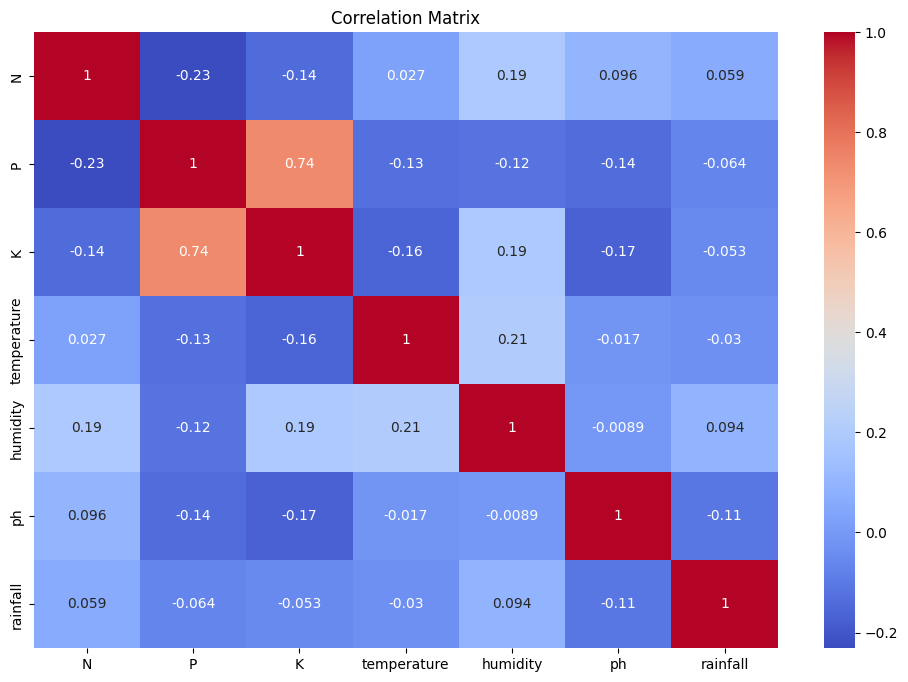

In [ ]:
# Plot correlation matrix
correlation_matrix = data.drop('label', axis=1).corr() # Drop the 'label' column before calculating correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Build Model and Pediction

In [ ]:
# Assuming 'pH' as the target variable
X = data[['N','P','K','temperature','humidity','ph','rainfall']]  # Exclude 'label' column
y = data['ph']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)  # Now fitting with only numerical features

# Model Interpretation
# Print model coefficients
print('Model Coefficients:')
for feature, coef in zip(X.columns, model.coef_):
    print(f'{feature}: {coef:.4f}')

Model Coefficients:
N: -0.0000
P: 0.0000
K: -0.0000
temperature: -0.0000
humidity: 0.0000
ph: 1.0000
rainfall: 0.0000


In [ ]:
# Create an imputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on X_test
X_test_imputed = imputer.fit_transform(X_test)

# Now you can make predictions with the imputed data
y_pred = model.predict(X_test_imputed)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Remove rows with missing values from both X_test and y_test
X_test_cleaned = X_test.dropna()
y_test_cleaned = y_test[X_test_cleaned.index]

# Make predictions with the cleaned data
y_pred = model.predict(X_test_cleaned)

# Evaluate the model using cleaned data
mse = mean_squared_error(y_test_cleaned, y_pred)
r2 = r2_score(y_test_cleaned, y_pred)
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R-squared (R2): {r2:.4f}')

Mean Squared Error (MSE): 0.0000
R-squared (R2): 1.0000
